# Loading Libraries

In [ ]:
# Basic 
import numpy as np
import pandas as pd

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

# Loading Data

In [ ]:
# download the dataset
!wget -O data.csv https://raw.githubusercontent.com/emiletimothy/Caltech-CS155-2023/main/miniproject2/data/data.csv
!wget -O movies.csv https://raw.githubusercontent.com/emiletimothy/Caltech-CS155-2023/main/miniproject2/data/movies.csv

--2023-03-01 08:02:59--  https://raw.githubusercontent.com/emiletimothy/Caltech-CS155-2023/main/miniproject2/data/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1596528 (1.5M) [text/plain]
Saving to: ‘data.csv’

data.csv            100%[===================>]   1.52M  --.-KB/s    in 0.06s   

2023-03-01 08:03:00 (27.3 MB/s) - ‘data.csv’ saved [1596528/1596528]

--2023-03-01 08:03:00--  https://raw.githubusercontent.com/emiletimothy/Caltech-CS155-2023/main/miniproject2/data/movies.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 O

In [ ]:
movies = pd.read_csv("movies.csv")
movies.head()

,Movie ID,Movie Title,Unknown,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,(500) Days of Summer (2009),0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,10 Cloverfield Lane (2016),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2,"10,000 BC (2008)",0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
3,3,12 Years a Slave (2013),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,127 Hours (2010),0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
ratings = pd.read_csv("data.csv")
ratings.head()

,User ID,Movie ID,Rating
0,0,88,4.0
1,0,545,3.5
2,0,7,3.0
3,0,401,4.0
4,0,1230,0.5


# Basic Visualization

## Ratings

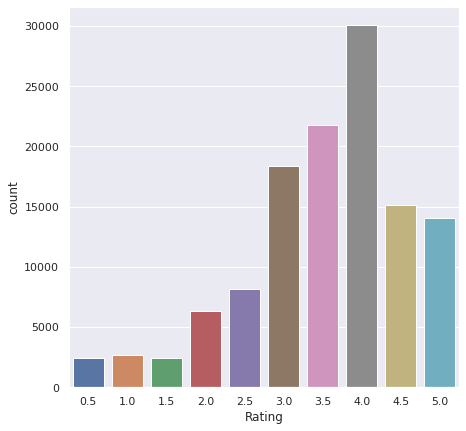

In [ ]:
plt.figure(figsize=(7,7))
sns.countplot(x=ratings['Rating'])
plt.show()

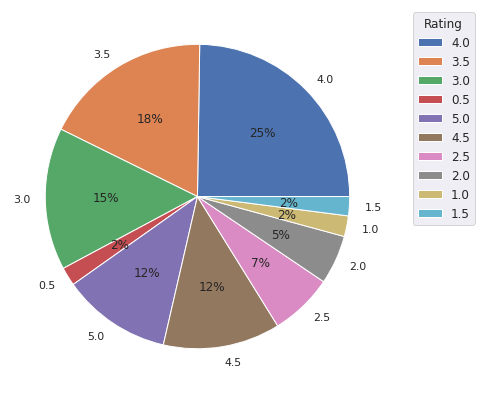

In [ ]:
plt.figure(figsize=(7,7))
plt.pie(x=[len(ratings[ratings['Rating']==i]) for i in ratings['Rating'].unique()],labels=ratings['Rating'].unique(),autopct='%1.f%%')
plt.legend(bbox_to_anchor=(1.05, 1.0),loc='upper left', labels=ratings['Rating'].unique(), fontsize='medium',title="Rating")
plt.show()

## User-Movie Matrix

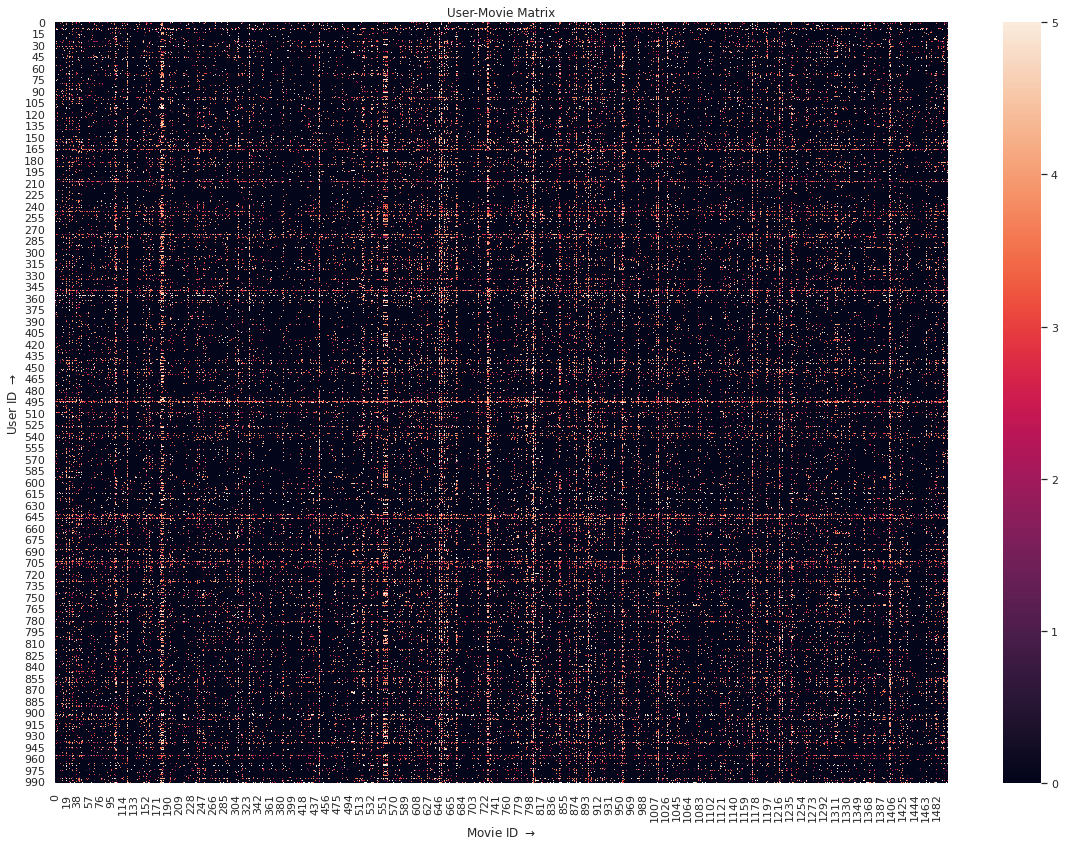

In [ ]:
n_users = ratings['User ID'].unique().shape[0]
n_mov = ratings['Movie ID'].unique().shape[0]

ratings_sm = np.zeros((n_users, n_mov))
for row in ratings.itertuples():
    ratings_sm[row[1]-1, row[2]-1] = row[3]


plt.figure(figsize=(20,14))
sns.heatmap(ratings_sm)
plt.title("User-Movie Matrix")
plt.xlabel(r"Movie ID $\rightarrow$")
plt.ylabel(r"User ID $\rightarrow$")
plt.show()

## Average Rating vs Movie Year

In [ ]:
year = []

for m in np.array(movies['Movie Title']):
    year.append(m[-5:-1])

movies['Year'] = year

movies.head()

,Movie ID,Movie Title,Unknown,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Year
0,0,(500) Days of Summer (2009),0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,2009
1,1,10 Cloverfield Lane (2016),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,2016
2,2,"10,000 BC (2008)",0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,2008
3,3,12 Years a Slave (2013),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2013
4,4,127 Hours (2010),0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,2010


In [ ]:
years_val = np.sort(list(movies['Year'].unique()))
ratings_val = np.sort(list(ratings['Rating'].unique()))

n_years = years_val.shape[0]
n_ratings = ratings_val.shape[0]

yr_rating_ct = np.zeros((n_ratings,n_years))
yr_rating_mean = np.zeros((n_years,))
yr_rating_std = np.zeros((n_years,))

for i in range(n_years):

    p = movies[movies['Year']== years_val[i]]['Movie ID']

    for j in range(n_ratings):

        yr_rating_ct[j][i] = sum([len(ratings[(ratings['Rating']==ratings_val[j]) & (ratings['Movie ID']==k)]['Movie ID'].unique()) for k in p.index])
    
    yr_rating_mean[i] = np.mean([ratings[(ratings['Movie ID']==k)]['Rating'].mean() for k in p.index])
    yr_rating_std[i] = np.std([ratings[(ratings['Movie ID']==k)]['Rating'].mean() for k in p.index])

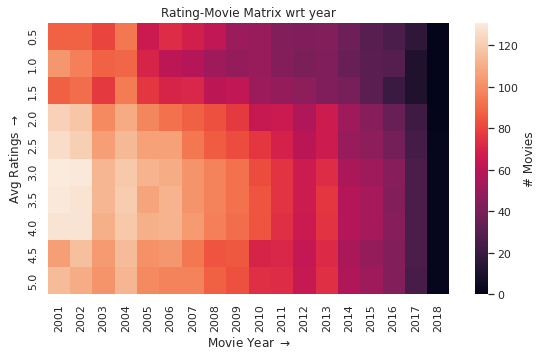

In [ ]:
# heatmap plot

plt.figure(figsize=(9,5))
sns.heatmap(yr_rating_ct,xticklabels=years_val,yticklabels=ratings_val,cbar_kws={'label': r'# Movies'})
plt.title("Rating-Movie Matrix wrt year")
plt.xlabel(r"Movie Year $\rightarrow$")
plt.ylabel(r"Avg Ratings $\rightarrow$")

plt.show()

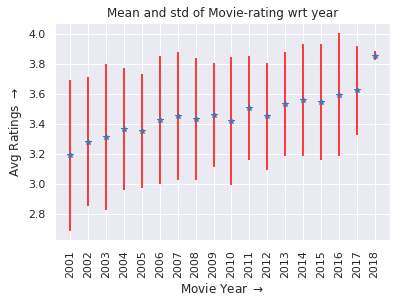

In [ ]:
# errorbar plot

plt.errorbar(years_val,yr_rating_mean,yr_rating_std, linestyle='None', marker='*',ecolor='Red')
plt.xticks(rotation=90)
plt.title("Mean and std of Movie-rating wrt year")
plt.xlabel(r"Movie Year $\rightarrow$")
plt.ylabel(r"Avg Ratings $\rightarrow$")
plt.show()

In [ ]:
movies = pd.read_csv("movies.csv")
ratings = pd.read_csv("data.csv")

## Most Popular

In [ ]:
movie_dict = dict(zip(movies['Movie ID'],movies['Movie Title']))

In [ ]:
most_pop_mov = ratings.groupby("Movie ID").size().sort_values(ascending=False)[:10]

### All Ratings Together

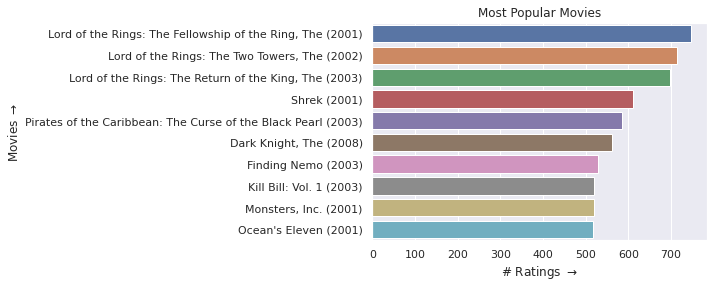

In [ ]:
sns.barplot(x=most_pop_mov.values,y=np.vectorize(movie_dict.get)(most_pop_mov.index).astype(str),orient="h")
plt.xlabel(r"# Ratings $\rightarrow$")
plt.ylabel(r"Movies $\rightarrow$")
plt.title("Most Popular Movies")
plt.show()

### Ratings Separately

In [ ]:
most_pop_ratings_dict = {}
n_rat = ratings['Rating'].unique()

for i in n_rat:
    most_pop_ratings_dict[i] = [len(ratings[(ratings['Rating']==i) & (ratings['Movie ID']==j)]) for j in most_pop_mov.index]


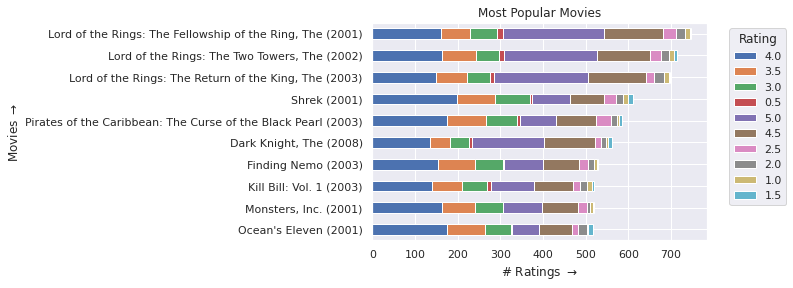

In [ ]:
rat_sep_df = pd.DataFrame(most_pop_ratings_dict,index=np.vectorize(movie_dict.get)(most_pop_mov.index).astype(str)).iloc[::-1]
rat_sep_df.plot(kind='barh', stacked=True)
plt.xlabel(r"# Ratings $\rightarrow$")
plt.ylabel(r"Movies $\rightarrow$")
plt.title("Most Popular Movies")
plt.legend(title="Rating",bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

## Ten Best Movies

In [ ]:
movie_dict = dict(zip(movies['Movie ID'],movies['Movie Title']))

In [ ]:
best_mov = ratings.groupby("Movie ID")["Rating"].mean().sort_values(ascending=False)[:10]

### All Ratings Together

In [ ]:
best_movie_dict = {}
n_rat = ratings['Rating'].unique()
n_movies = list(best_mov.index)

best_movie_values = []

for i in n_movies:
    best_movie_dict[i] = [len(ratings[(ratings['Movie ID']==i) & (ratings['Rating']==j)]) for j in n_rat]

for i in best_movie_dict.values():
    best_movie_values.append(np.sum(i))

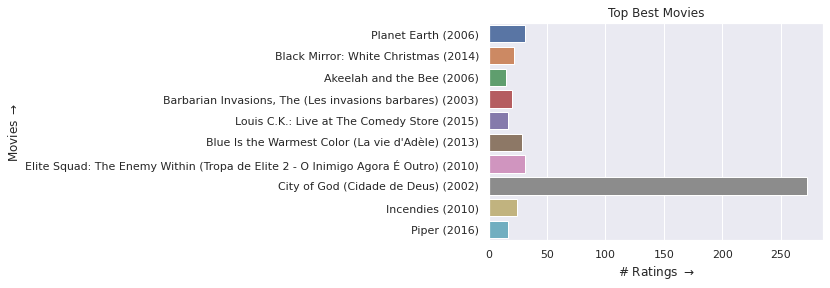

In [ ]:
sns.barplot(x=best_movie_values,y=np.vectorize(movie_dict.get)(best_mov.index).astype(str),orient="h")
plt.xlabel(r"# Ratings $\rightarrow$")
plt.ylabel(r"Movies $\rightarrow$")
plt.title("Top Best Movies")
plt.show()

### Ratings Separately

In [ ]:
best_ratings_dict = {}
n_rat = ratings['Rating'].unique()

for i in n_rat:
    best_ratings_dict[i] = [len(ratings[(ratings['Rating']==i) & (ratings['Movie ID']==j)]) for j in best_mov.index]


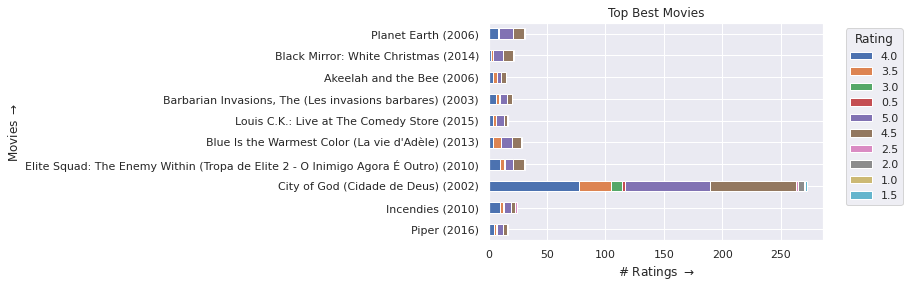

In [ ]:
rat_sep_df = pd.DataFrame(best_ratings_dict,index=np.vectorize(movie_dict.get)(best_mov.index).astype(str)).iloc[::-1]
rat_sep_df.plot(kind='barh', stacked=True)
plt.xlabel(r"# Ratings $\rightarrow$")
plt.ylabel(r"Movies $\rightarrow$")
plt.title("Top Best Movies")
plt.legend(title="Rating",bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

## Visualization Based on Genres


In [ ]:
genres = np.array(movies.columns[2:])

In [ ]:
genres

array(['Unknown', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western'], dtype=object)

In [ ]:
movies = pd.read_csv("movies.csv")
ratings = pd.read_csv("data.csv")
movie_dict = dict(zip(movies['Movie ID'],movies['Movie Title']))
inv_movie_dict = {v:k for k,v in movie_dict.items()}

In [ ]:
n_rat = ratings['Rating'].unique()

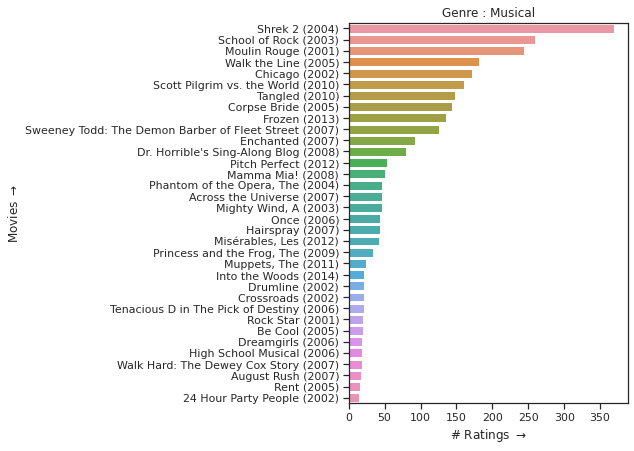

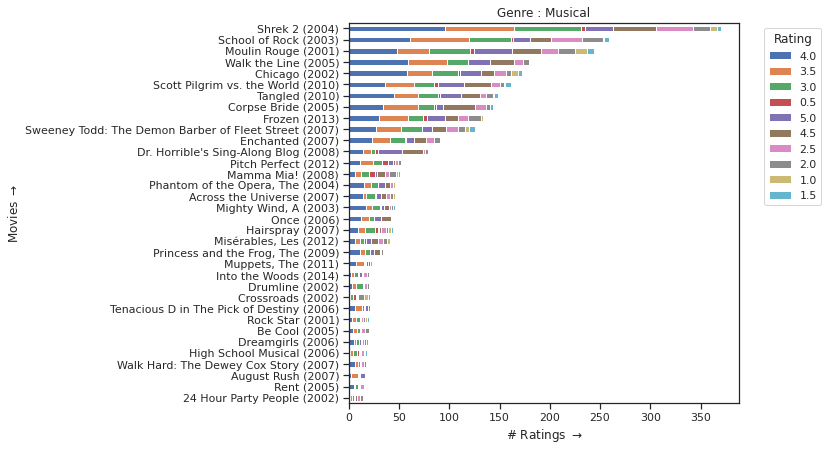

In [ ]:
gen ="Musical"

gen_id = movies[movies[gen]==1]['Movie ID'].values

gen_series = pd.Series({movie_dict[i]:sum(ratings['Movie ID']==i) for i in gen_id}).sort_values(ascending=False)

plt.figure(figsize=(5,7))
sns.barplot(x=gen_series.values,y=gen_series.index,orient="h")
plt.xlabel(r"# Ratings $\rightarrow$")
plt.ylabel(r"Movies $\rightarrow$")
plt.title("Genre : "+gen)
plt.show()


most_pop_ratings_dict = {}

for i in n_rat:
    most_pop_ratings_dict[i] = [len(ratings[(ratings['Rating']==i) & (ratings['Movie ID']==inv_movie_dict[j])]) for j in gen_series.index]


rat_sep_df = pd.DataFrame(most_pop_ratings_dict,index=gen_series.index).iloc[::-1]
rat_sep_df.plot(kind='barh', stacked=True,figsize=(7,7))
plt.xlabel(r"# Ratings $\rightarrow$")
plt.ylabel(r"Movies $\rightarrow$")
plt.title("Genre : "+gen)
plt.legend(title="Rating",bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()


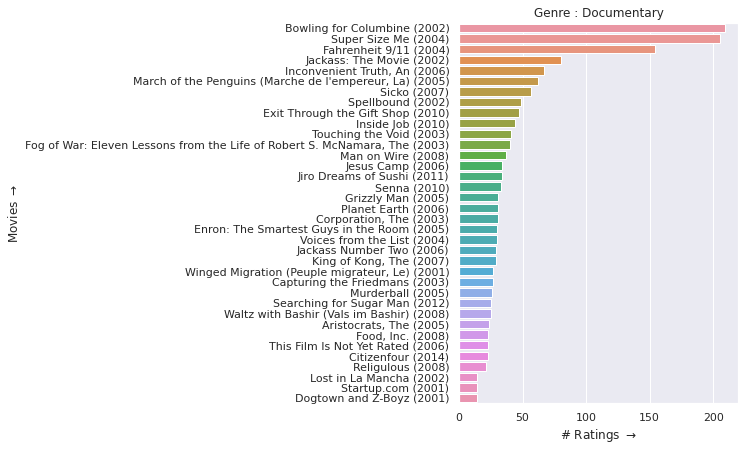

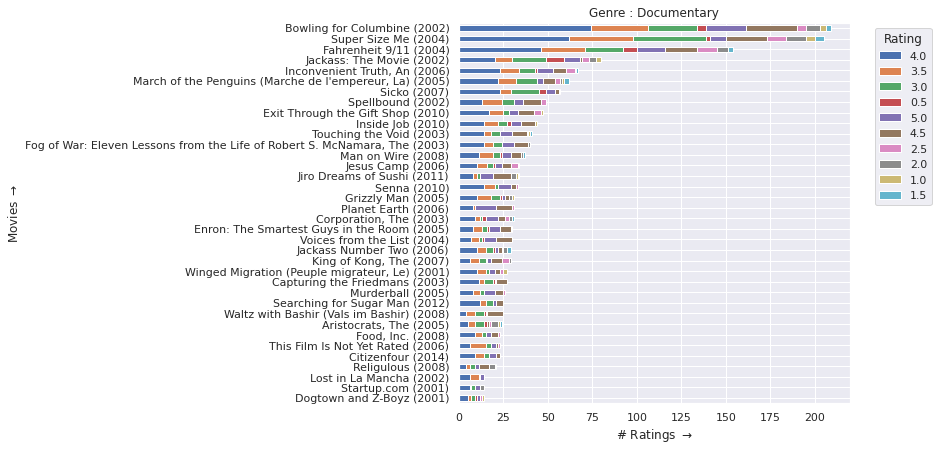

In [ ]:
gen ="Documentary"

gen_id = movies[movies[gen]==1]['Movie ID'].values

gen_series = pd.Series({movie_dict[i]:sum(ratings['Movie ID']==i) for i in gen_id}).sort_values(ascending=False)


plt.figure(figsize=(5,7))

sns.barplot(x=gen_series.values,y=gen_series.index,orient="h")
plt.xlabel(r"# Ratings $\rightarrow$")
plt.ylabel(r"Movies $\rightarrow$")
plt.title("Genre : "+gen)
plt.show()


most_pop_ratings_dict = {}

for i in n_rat:
    most_pop_ratings_dict[i] = [len(ratings[(ratings['Rating']==i) & (ratings['Movie ID']==inv_movie_dict[j])]) for j in gen_series.index]


rat_sep_df = pd.DataFrame(most_pop_ratings_dict,index=gen_series.index).iloc[::-1]
rat_sep_df.plot(kind='barh', stacked=True,figsize=(7,7))
plt.xlabel(r"# Ratings $\rightarrow$")
plt.ylabel(r"Movies $\rightarrow$")
plt.title("Genre : "+gen)
plt.legend(title="Rating",bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

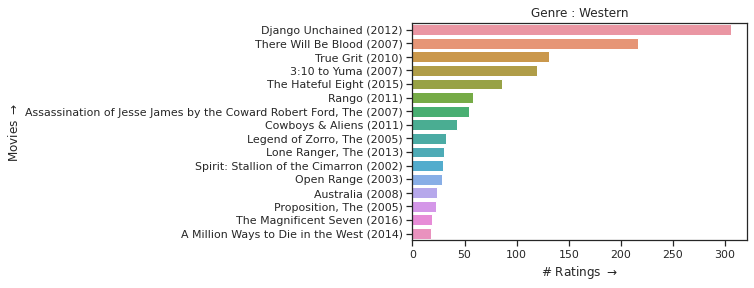

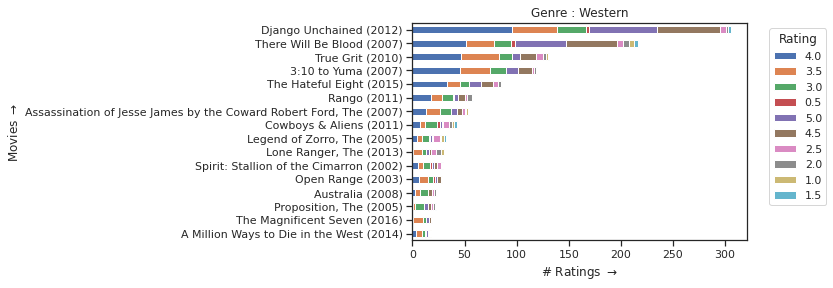

In [ ]:
gen ="Western"

gen_id = movies[movies[gen]==1]['Movie ID'].values

gen_series = pd.Series({movie_dict[i]:sum(ratings['Movie ID']==i) for i in gen_id}).sort_values(ascending=False)


sns.barplot(x=gen_series.values,y=gen_series.index,orient="h")
plt.xlabel(r"# Ratings $\rightarrow$")
plt.ylabel(r"Movies $\rightarrow$")
plt.title("Genre : "+gen)
plt.show()


most_pop_ratings_dict = {}

for i in n_rat:
    most_pop_ratings_dict[i] = [len(ratings[(ratings['Rating']==i) & (ratings['Movie ID']==inv_movie_dict[j])]) for j in gen_series.index]


rat_sep_df = pd.DataFrame(most_pop_ratings_dict,index=gen_series.index).iloc[::-1]
rat_sep_df.plot(kind='barh', stacked=True)
plt.xlabel(r"# Ratings $\rightarrow$")
plt.ylabel(r"Movies $\rightarrow$")
plt.title("Genre : "+gen)
plt.legend(title="Rating",bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()